# Notebook 1: The first simulation

This noteboook covers the very basics of setting up a finite difference frequency domain (FDFD) simulation in `ceviche`.

In [2]:
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi']=100
import matplotlib.pylab as plt

import ceviche

## The simplest example: a line source above a dielectric 

In [3]:
omega = 2*np.pi*200e12

dl = 25e-9

Nx = 100
Ny = 100
Npml = 20

In [4]:
epsr = np.ones((Nx, Ny))  
epsr[0:50,0:50] = 12

source = np.zeros((Nx, Ny), dtype=np.complex) 
source[40:60,70] = 1j

In [5]:
simulation = ceviche.fdfd_ez(omega, dl, epsr, [Npml, Npml])
Hx, Hy, Ez = simulation.solve(source)

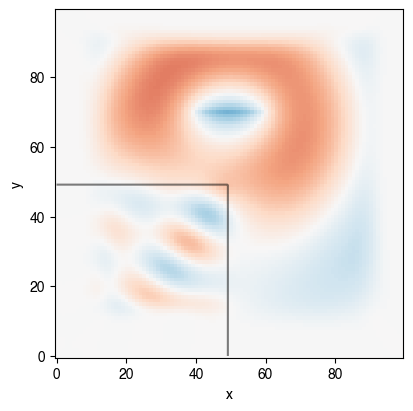

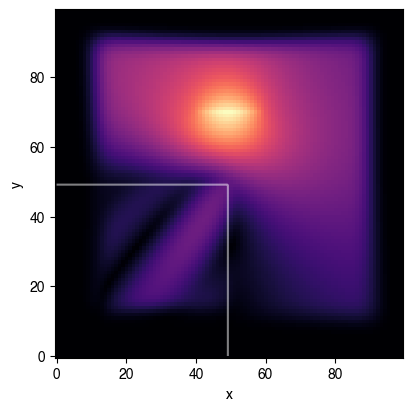

In [6]:
ceviche.viz.real(Ez, outline=epsr, cbar=False)
ceviche.viz.abs(Ez, outline=epsr, cbar=False)

## A simple example: a waveguide

In [7]:
omega = 2*np.pi*200e12
dl = 25e-9

Nx = 200
Ny = 80
Npml = 20

epsr = np.ones((Nx, Ny))  
epsr[:,35:45] = 12

In [8]:
src_y = np.arange(20,60)
src_x = 30 * np.ones(src_y.shape, dtype=int)
source = ceviche.modes.insert_mode(omega, dl, src_x, src_y, epsr)

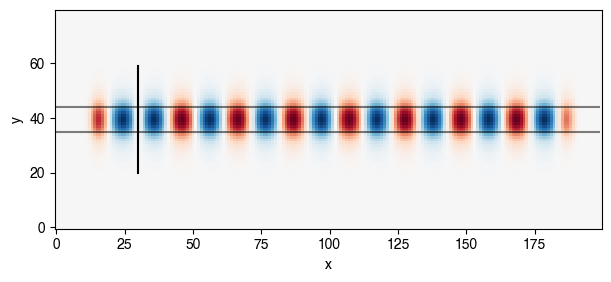

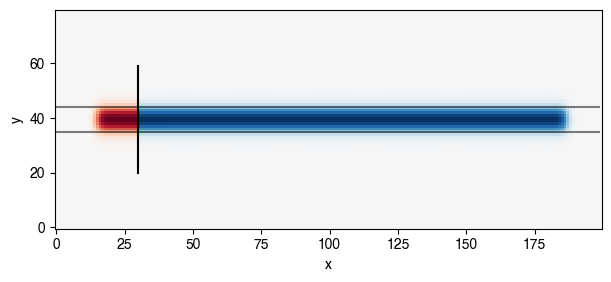

In [9]:
simulation = ceviche.fdfd_ez(omega, dl, epsr, [Npml, Npml])
Hx, Hy, Ez = simulation.solve(source)

ax = ceviche.viz.real(Ez, outline=epsr, cbar=False)
ax.plot(src_x,src_y,'k')

Sx = -0.5 * np.real(Ez * np.conj(Hy))
Sy =  0.5 * np.real(Ez * np.conj(Hx))

ax = ceviche.viz.real(Sx, outline=epsr, cbar=False)
ax.plot(src_x,src_y,'k')

## A ring

In [10]:
omega = 2*np.pi*200e12
dl = 25e-9

Nx = 200
Ny = 180
Npml = 20

epsr = np.ones((Nx, Ny))  
epsr[:,35:45] = 12

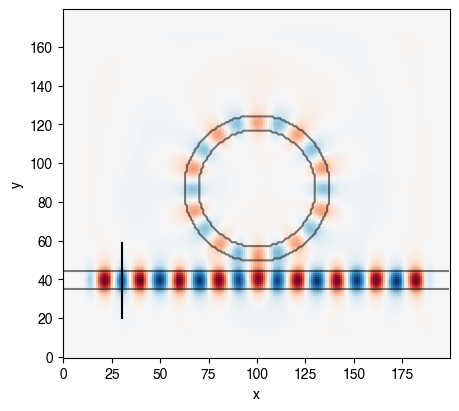

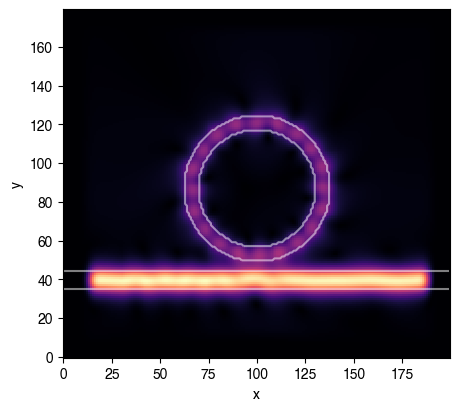

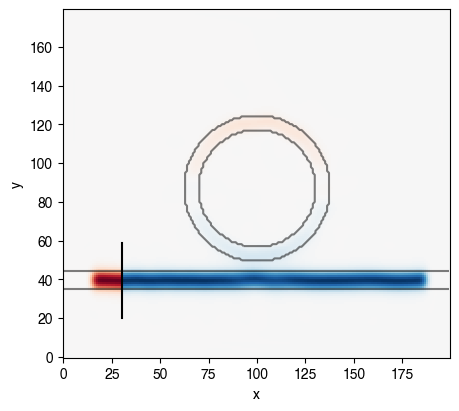

In [11]:
import skimage

rr, cc = skimage.draw.circle(100, 87, 38)
epsr[rr,cc] = 12
rr, cc = skimage.draw.circle(100, 87, 30)
epsr[rr,cc] = 1

src_y = np.arange(20,60)
src_x = 30 * np.ones(src_y.shape, dtype=int)
source = ceviche.modes.insert_mode(omega, dl, src_x, src_y, epsr)

simulation = ceviche.fdfd_ez(omega, dl, epsr, [Npml, Npml])
Hx, Hy, Ez = simulation.solve(source)

ax = ceviche.viz.real(Ez, outline=epsr, cbar=False)
ax.plot(src_x,src_y,'k')

ax = ceviche.viz.abs(Ez, outline=epsr, cbar=False)

Sx = -0.5 * np.real(Ez * np.conj(Hy))
Sy =  0.5 * np.real(Ez * np.conj(Hx))

ax = ceviche.viz.real(Sx, outline=epsr, cbar=False)

ax.plot(src_x,src_y,'k')